In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
orders_products_merged = pd.read_pickle(r'C:\Users\kenta\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_merged.pkl')

In [3]:
df = orders_products_merged[:1000000]

In [4]:
df.shape

(1000000, 15)

In [41]:
# 1. If you haven’t done so already, complete the instructions in the Exercise for creating the “price_label” and “busiest_day” columns.
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [6]:
df['price_range'] = df.apply(price_label, axis=1)

<ipython-input-6-fe64de1169c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [7]:
df['price_range'].value_counts(dropna = False)

Mid-range product    672525
Low-range product    314109
High range            12413
Not enough data         953
Name: price_range, dtype: int64

In [8]:
orders_products_merged.rename(columns = {'order_dow':'orders_day_of_the_week'}, inplace = True)

In [9]:
orders_products_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,prior,1,2,8,11.11,196,1,0,Soda,77.0,7.0,9.0,both
1,2539329,1,prior,1,2,8,11.11,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both
2,2539329,1,prior,1,2,8,11.11,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,both
3,2539329,1,prior,1,2,8,11.11,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both
4,2539329,1,prior,1,2,8,11.11,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both


In [10]:
orders_products_merged['orders_day_of_the_week'].value_counts(dropna = False)

0    6209808
1    5665951
6    4500391
2    4217868
5    4209603
3    3844175
4    3787263
Name: orders_day_of_the_week, dtype: int64

In [11]:
result = []

for value in orders_products_merged["orders_day_of_the_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [12]:
orders_products_merged['busiest_day'] = result

In [13]:
orders_products_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22437988
Busiest day        6209808
Least busy         3787263
Name: busiest_day, dtype: int64

In [14]:
# 2. Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.
result_1 = []

for value in orders_products_merged["orders_day_of_the_week"]:
  if value == 0:
    result_1.append("Busiest days")
  elif value == 1:
    result_1.append("Busiest days")
  elif value == 3:
    result_1.append("Slowest days")
  elif value == 4:
    result_1.append("Slowest days")
  else:
    result_1.append("Regularly busy")

In [15]:
orders_products_merged['busiest_days'] = result_1

In [16]:
orders_products_merged.shape

(32435059, 17)

In [17]:
orders_products_merged['busiest_days'].value_counts(dropna = False)

Regularly busy    12927862
Busiest days      11875759
Slowest days       7631438
Name: busiest_days, dtype: int64

Regularly busy:    13010466

Busiest days:     11949665

Slowest days:       7681137

In [18]:
# 4. When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”
orders_products_merged['order_hour_of_day'].value_counts(dropna = False)

10    2764476
11    2738647
14    2691598
15    2664583
13    2663346
12    2620898
16    2537506
9     2456751
17    2089510
8     1719991
18    1637956
19    1259416
20     977049
7      891951
21     796379
22     634743
23     402621
6      290796
0      218951
1      115787
5       88064
2       69435
4       53284
3       51321
Name: order_hour_of_day, dtype: int64

In [19]:
orders_products_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days
0,2539329,1,prior,1,2,8,11.11,196,1,0,Soda,77.0,7.0,9.0,both,Regularly busy,Regularly busy
1,2539329,1,prior,1,2,8,11.11,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Regularly busy,Regularly busy
2,2539329,1,prior,1,2,8,11.11,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,both,Regularly busy,Regularly busy
3,2539329,1,prior,1,2,8,11.11,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Regularly busy,Regularly busy
4,2539329,1,prior,1,2,8,11.11,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Regularly busy,Regularly busy


In [20]:
orders_products_merged.loc[(orders_products_merged['order_hour_of_day']==0) & (orders_products_merged['order_hour_of_day']>=1) & (orders_products_merged['order_hour_of_day']<=6), 'busy_time'] = 'Fewest orders'

In [21]:
orders_products_merged.loc[(orders_products_merged['order_hour_of_day']>=7) & (orders_products_merged['order_hour_of_day']<=8), 'busy_time'] = 'Average orders'

In [22]:
orders_products_merged.loc[(orders_products_merged['order_hour_of_day']>=9) & (orders_products_merged['order_hour_of_day']<=16), 'busy_time'] = 'Most orders'

In [23]:
orders_products_merged.loc[(orders_products_merged['order_hour_of_day']>=17) & (orders_products_merged['order_hour_of_day']<=22), 'busy_time'] = 'Average orders'

In [24]:
orders_products_merged.loc[(orders_products_merged['order_hour_of_day']==23), 'busy_time'] = 'Fewest orders'

In [25]:
# 5. Print the frequency for this new column.
orders_products_merged['busy_time'].value_counts(dropna = False)

Most orders       21137805
Average orders    10006995
NaN                 887638
Fewest orders       402621
Name: busy_time, dtype: int64

In [26]:
orders_products_merged['busy_time'].shape

(32435059,)

In [27]:
orders_products_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busy_time
0,2539329,1,prior,1,2,8,11.11,196,1,0,Soda,77.0,7.0,9.0,both,Regularly busy,Regularly busy,Average orders
1,2539329,1,prior,1,2,8,11.11,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Regularly busy,Regularly busy,Average orders
2,2539329,1,prior,1,2,8,11.11,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,both,Regularly busy,Regularly busy,Average orders
3,2539329,1,prior,1,2,8,11.11,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Regularly busy,Regularly busy,Average orders
4,2539329,1,prior,1,2,8,11.11,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Regularly busy,Regularly busy,Average orders


In [28]:
orders_products_merged.to_pickle(r'C:\Users\kenta\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_merged_with_new_variable.pkl')

In [42]:
orders_products_merged['price_range'] = orders_products_merged.apply(price_label, axis=1)

In [43]:
orders_products_merged['price_range'].value_counts(dropna = False)

Mid-range          21860860
Low-range          10126321
High range           417678
Not enough data       30200
Name: price_range, dtype: int64

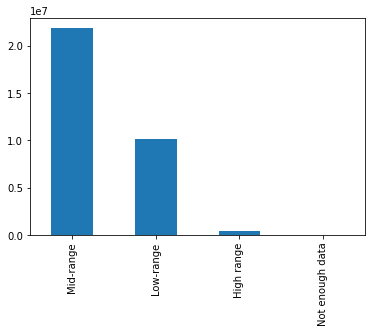

In [44]:
price_range = orders_products_merged['price_range'].value_counts().plot.bar()

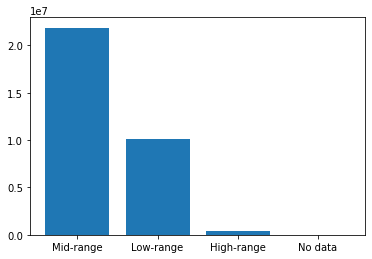

In [65]:
fig = plt.figure()
label = ['Mid-range', 'Low-range', 'High-range', 'No data']
value = orders_products_merged['price_range'].value_counts()
price_range_g = plt.bar(label, value)

In [52]:
fig.savefig(r'C:\Users\kenta\Instacart Basket Analysis\04 Analysis\Visualizations\price_range.png')

In [37]:
orders_products_merged[orders_products_merged['price_range'] == 'Not enough data']

,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busy_time,price_range
2963,7099,27,prior,63,3,10,1.00,6799,1,0,NaN,NaN,NaN,NaN,left_only,Regularly busy,Slowest days,Most orders,Not enough data
3205,1837192,27,prior,80,2,8,6.00,6799,9,1,NaN,NaN,NaN,NaN,left_only,Regularly busy,Regularly busy,Average orders,Not enough data
3253,3331846,28,prior,3,0,16,2.00,34,6,0,NaN,NaN,NaN,NaN,left_only,Busiest day,Busiest days,Most orders,Not enough data
3395,1385910,28,prior,21,2,17,1.00,34,1,1,NaN,NaN,NaN,NaN,left_only,Regularly busy,Regularly busy,Average orders,Not enough data
4694,2873174,38,prior,1,0,10,11.11,116,11,0,NaN,NaN,NaN,NaN,left_only,Busiest day,Busiest days,Most orders,Not enough data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32425294,443233,206139,prior,2,1,17,17.00,34,2,1,NaN,NaN,NaN,NaN,left_only,Regularly busy,Busiest days,Average orders,Not enough data
32425300,1507543,206139,prior,3,1,8,14.00,34,2,1,NaN,NaN,NaN,NaN,left_only,Regularly busy,Busiest days,Average orders,Not enough data
32427098,1282274,206155,prior,4,6,9,3.00,2240,18,0,NaN,NaN,NaN,NaN,left_only,Regularly busy,Regularly busy,Most orders,Not enough data
32431906,1586626,206194,prior,9,1,20,17.00,1511,6,0,NaN,NaN,NaN,NaN,left_only,Regularly busy,Busiest days,Average orders,Not enough data


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy